In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("Cryogenic Storage Tank Sales data.xlsx - Cryogenic sales data.csv")

In [4]:
df.head()

,Row ID,Order ID,Ship Date,month_Year,Year,Ship Mode,Customer ID,Customer Name,Segment,Country,...,State,Postal Code,Region,Product ID,Product name,Sales in Thousands,Quantity,Discount,Profit,month
0,1,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-BO-10001798,Cryogenic storage tanks,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-CH-10000454,Cryogenic storage tanks,731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,16-06-2022,2022-06,2022.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,California,90036,West,OFF-LA-10000240,Cryogenic storage tanks,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,FUR-TA-10000577,Cryogenic storage tanks,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,OFF-ST-10000760,Cryogenic storage tanks,22.3680,2,0.20,2.5164,10


In [5]:
df.rename(columns={"Sales in Thousands":"sales"},inplace=True)

In [6]:
df1 = df[["sales",'month']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   9994 non-null   float64
 1   month   9994 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 156.3 KB


In [7]:
df1.head()

,sales,month
0,261.9600,11
1,731.9400,11
2,14.6200,6
3,957.5775,10
4,22.3680,10


In [8]:
df1 = df1.set_index('month')
df1

,sales
month,
11,261.9600
11,731.9400
6,14.6200
10,957.5775
10,22.3680
...,...
1,25.2480
3,91.9600
3,258.5760


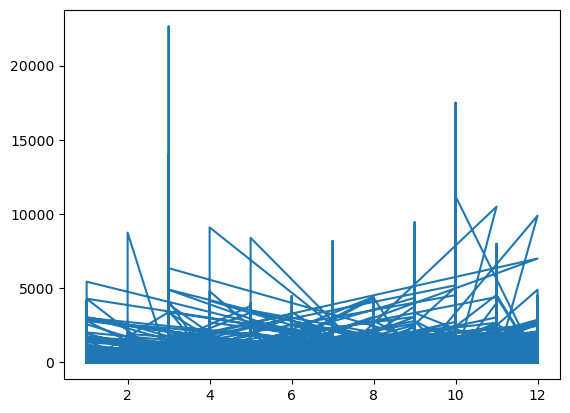

In [9]:
plt.plot(df1['sales'])

In [10]:
sales_by_month = df1.groupby('month')['sales'].sum()
sales_by_month

month
1     109456.6894
2      68546.4724
3     191665.3060
4     136953.6968
5     146361.9499
6     161335.7057
7     148170.6410
8     154153.1555
9     304631.1559
10    204727.0530
11    330681.7425
12    340517.2922
Name: sales, dtype: float64

In [11]:
sales_by_month_df = sales_by_month.reset_index()

# Rename the columns
sales_by_month_df.columns = ['month', 'sales']

print(type(sales_by_month_df))

<class 'pandas.core.frame.DataFrame'>


<AxesSubplot:>

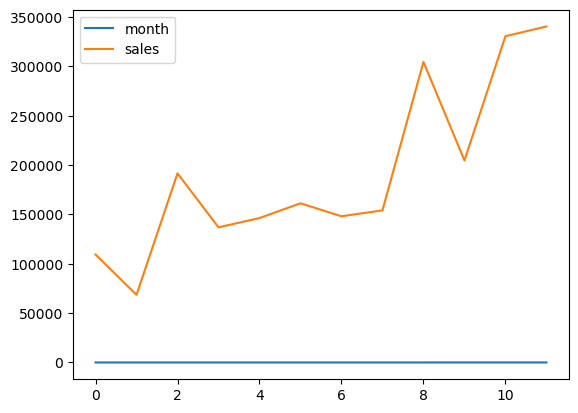

In [12]:
sales_by_month_df.plot()

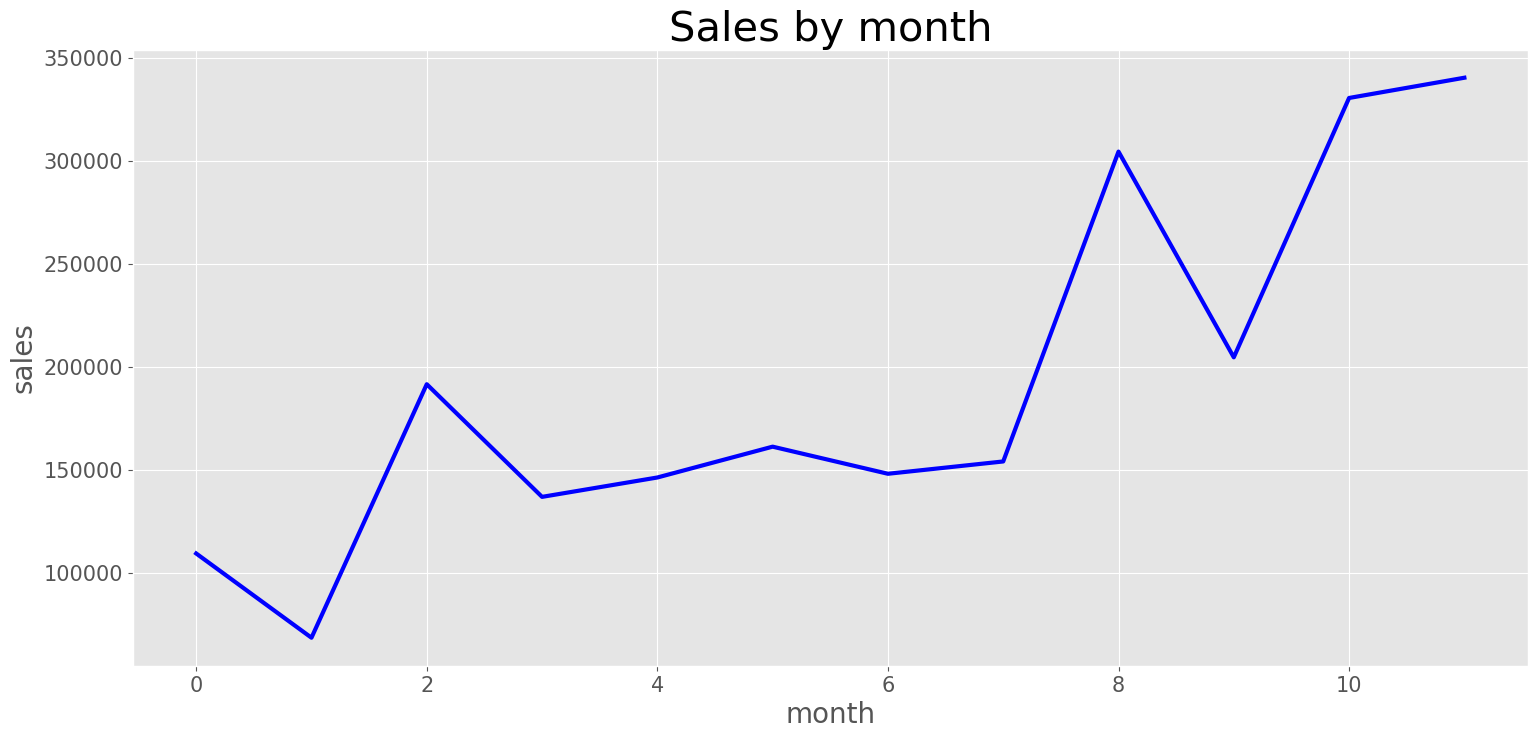

In [13]:
# plotting sales 
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('month', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('sales', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(sales_by_month_df['sales'], linewidth = 3, color = 'blue')
plt.title('Sales by month', fontsize = 30)
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

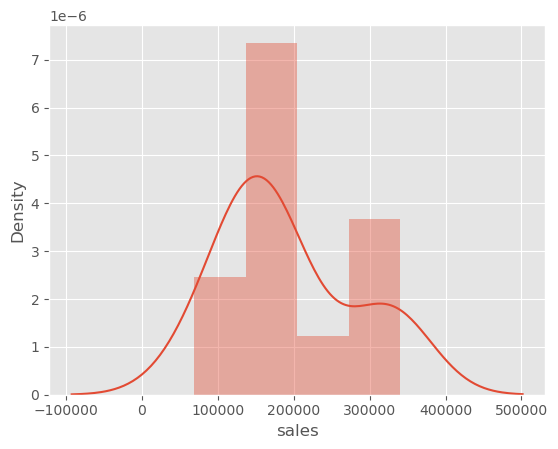

In [14]:
import seaborn as sns
sns.distplot(sales_by_month_df['sales'])

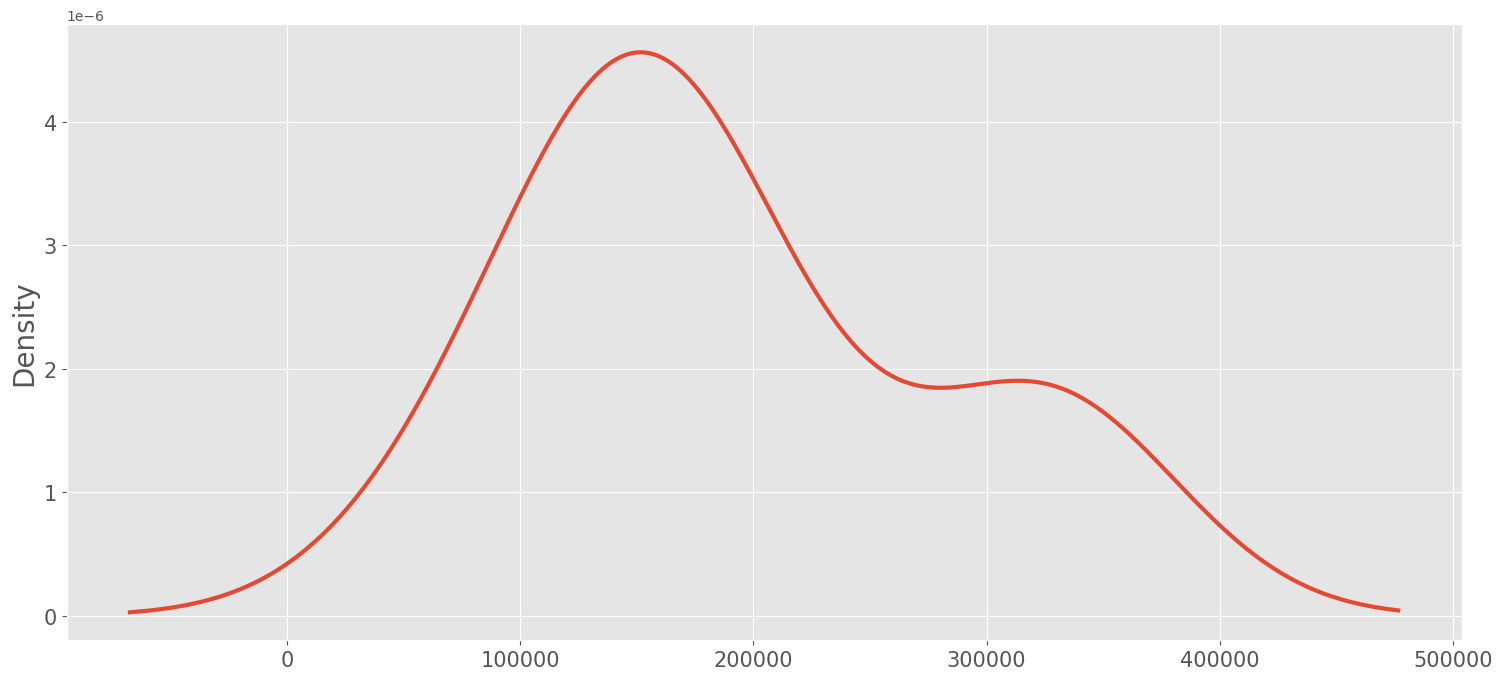

In [15]:
# Distribution of the close price  
df_sales = sales_by_month_df['sales'] 
df_sales.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [16]:
sales_by_month_df

,month,sales
0,1,109456.6894
1,2,68546.4724
2,3,191665.3060
3,4,136953.6968
4,5,146361.9499
5,6,161335.7057
6,7,148170.6410
7,8,154153.1555
8,9,304631.1559
9,10,204727.0530


In [17]:
type(sales_by_month_df['sales'])

pandas.core.series.Series

In [18]:
np.mean(sales_by_month_df['sales'].head())

130596.8229

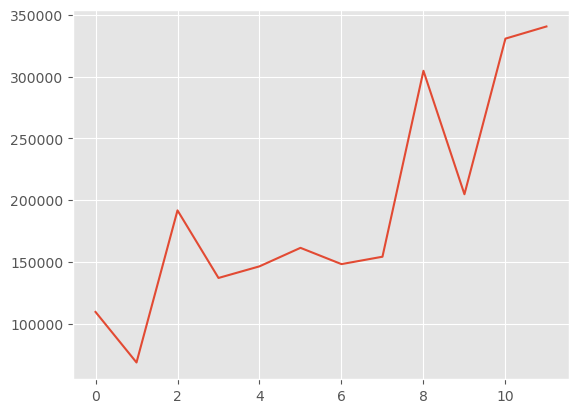

In [19]:
plt.plot(sales_by_month_df['sales'])

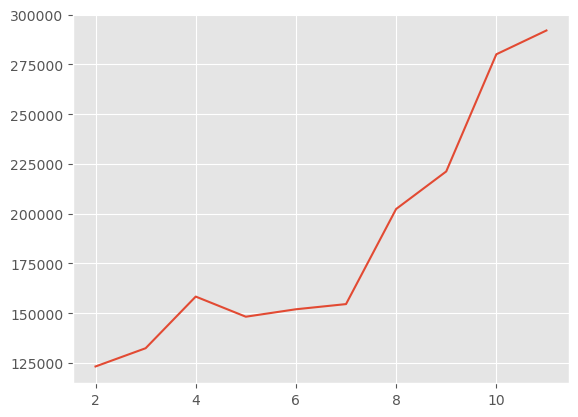

In [20]:
plt.plot(sales_by_month_df['sales'].rolling(3).mean())

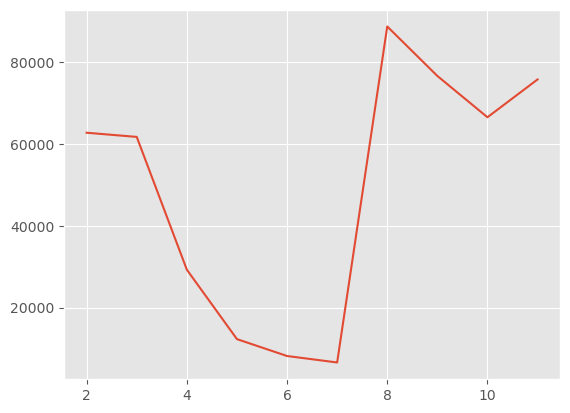

In [21]:
plt.plot(sales_by_month_df['sales'].rolling(3).std())

In [22]:
adfuller(sales_by_month_df['sales'],autolag='AIC')

(0.07008974972069665,
 0.9639586449474467,
 1,
 10,
 {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487},
 178.57171584210363)

In [23]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(2).mean() # rolling mean
    rolstd = timeseries.rolling(2).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

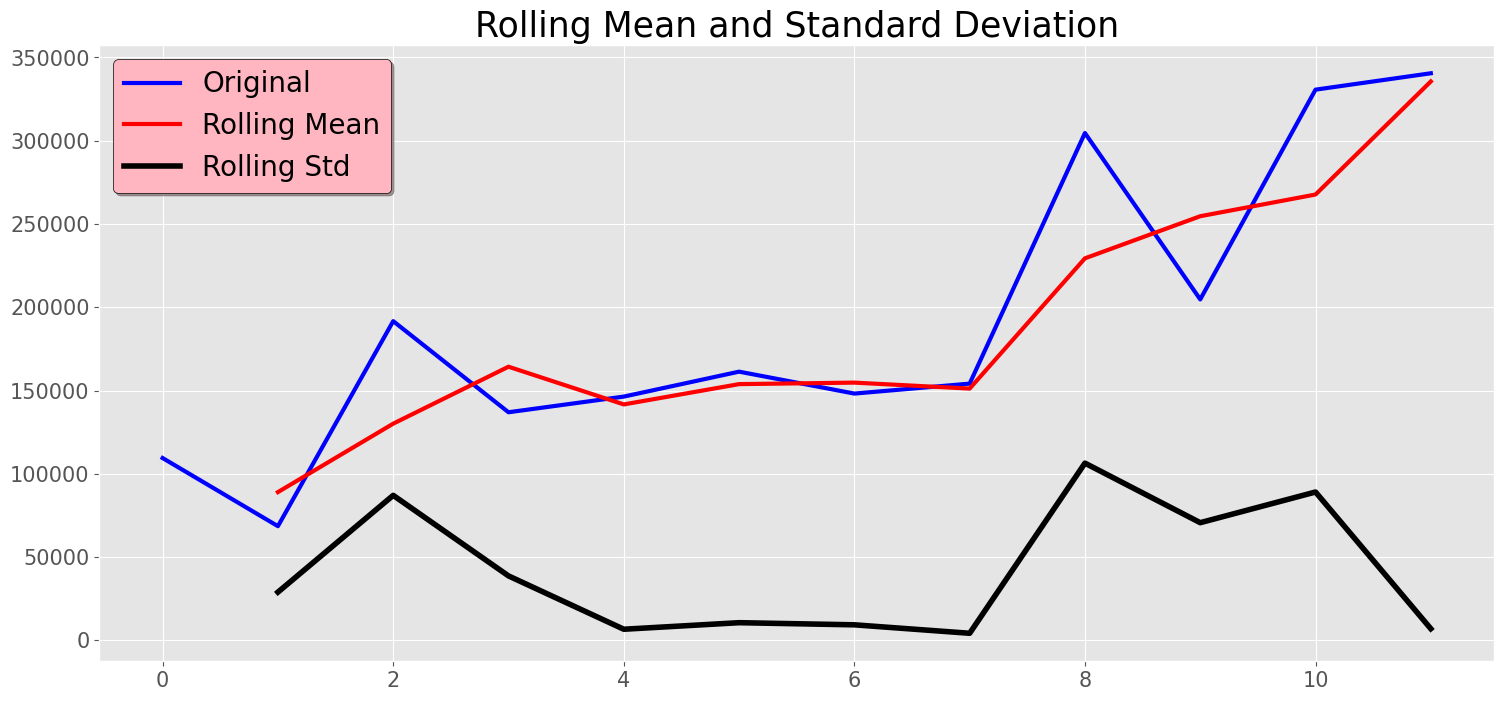

Results of dickey fuller test
Test Statistics                 0.070090
p-value                         0.963959
No. of lags used                1.000000
Number of observations used    10.000000
critical value (1%)            -4.331573
critical value (5%)            -3.232950
critical value (10%)           -2.748700
dtype: float64


In [24]:
test_stationarity(sales_by_month_df['sales'])

In [25]:
df_saless = sales_by_month_df['sales']

In [26]:
df_saless

0     109456.6894
1      68546.4724
2     191665.3060
3     136953.6968
4     146361.9499
5     161335.7057
6     148170.6410
7     154153.1555
8     304631.1559
9     204727.0530
10    330681.7425
11    340517.2922
Name: sales, dtype: float64

In [27]:
df_saless.diff(2)

0             NaN
1             NaN
2      82208.6166
3      68407.2244
4     -45303.3561
5      24382.0089
6       1808.6911
7      -7182.5502
8     156460.5149
9      50573.8975
10     26050.5866
11    135790.2392
Name: sales, dtype: float64

In [28]:
df_sales_diff_1 = df_saless.diff(2)

In [29]:
df_sales_diff_1.dropna(inplace=True)

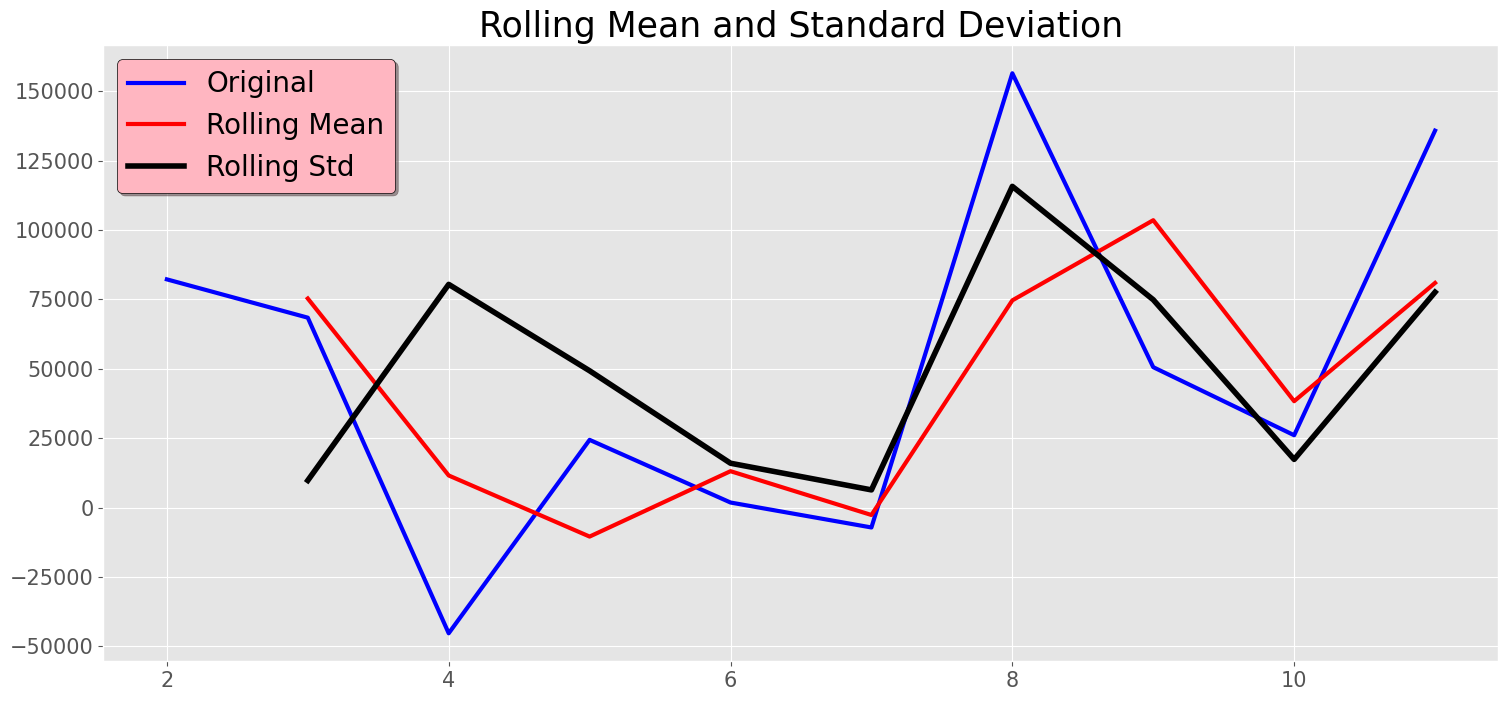

Results of dickey fuller test
Test Statistics               -5.861167e+00
p-value                        3.407746e-07
No. of lags used               3.000000e+00
Number of observations used    6.000000e+00
critical value (1%)           -5.354256e+00
critical value (5%)           -3.646238e+00
critical value (10%)          -2.901198e+00
dtype: float64


In [30]:
test_stationarity(df_sales_diff_1)

In [31]:
result=seasonal_decompose(sales_by_month_df[["sales"]],model='additive',period=2)

<Figure size 2000x1000 with 0 Axes>

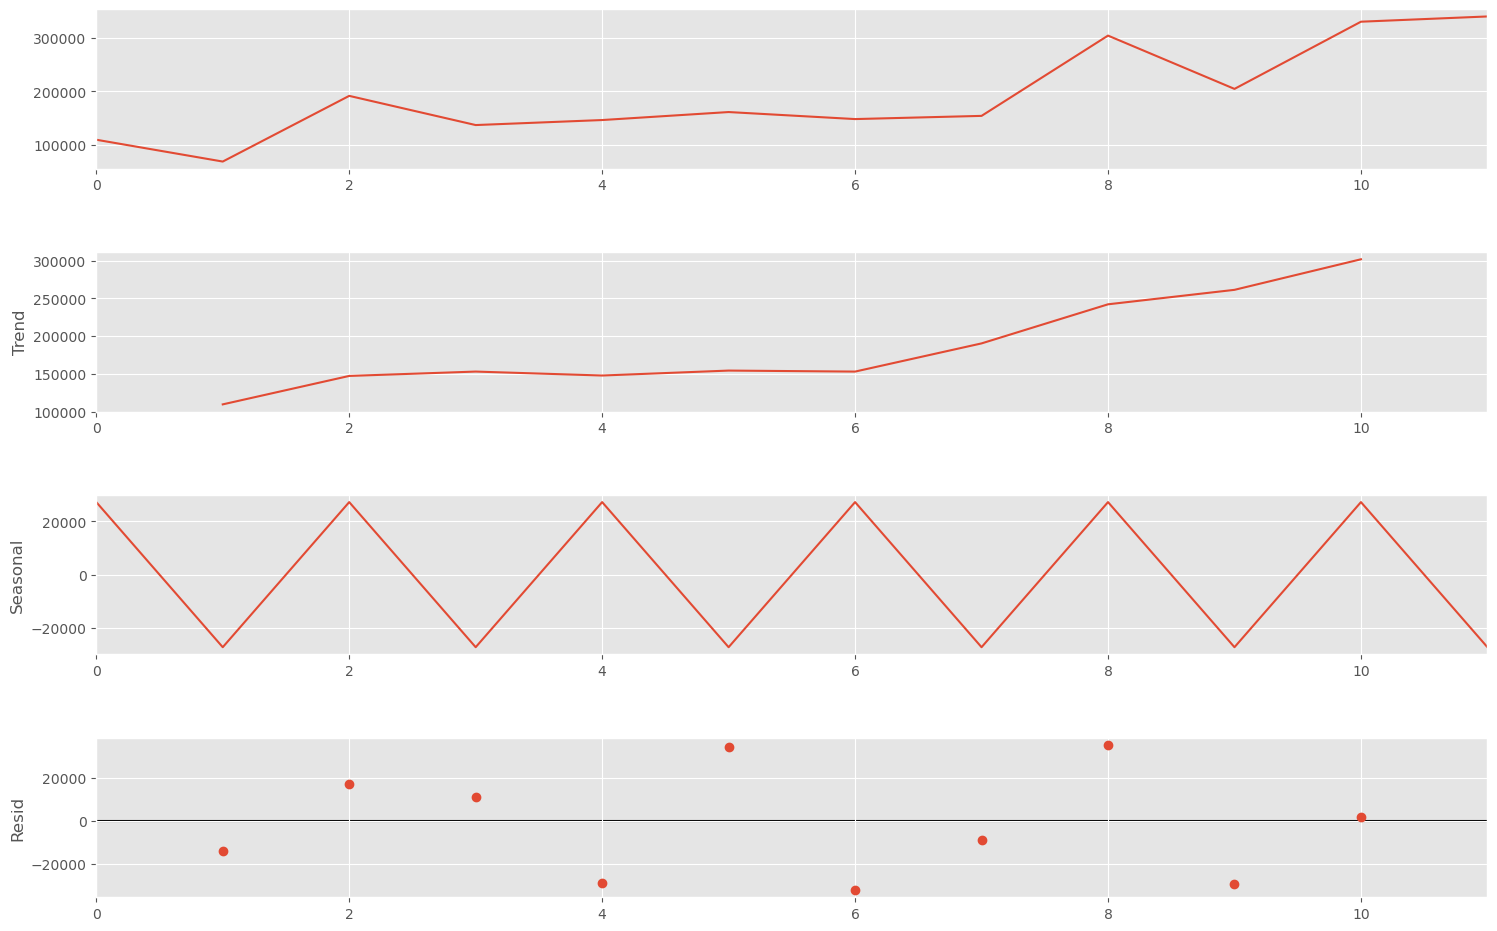

In [32]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [33]:
sales_by_month_df

,month,sales
0,1,109456.6894
1,2,68546.4724
2,3,191665.3060
3,4,136953.6968
4,5,146361.9499
5,6,161335.7057
6,7,148170.6410
7,8,154153.1555
8,9,304631.1559
9,10,204727.0530


In [250]:
# train_size = int(len(sales_by_month_df["sales"]) * 0.70)
# train_data, test_data = sales_by_month_df["sales"][:train_size], sales_by_month_df["sales"][train_size-1:]

In [122]:
train_data =sales_by_month_df[:-3]
train_data

,month,sales
0,1,109456.6894
1,2,68546.4724
2,3,191665.3060
3,4,136953.6968
4,5,146361.9499
5,6,161335.7057
6,7,148170.6410
7,8,154153.1555
8,9,304631.1559


In [123]:
test_data=sales_by_month_df[-3:]
test_data

,month,sales
9,10,204727.0530
10,11,330681.7425
11,12,340517.2922


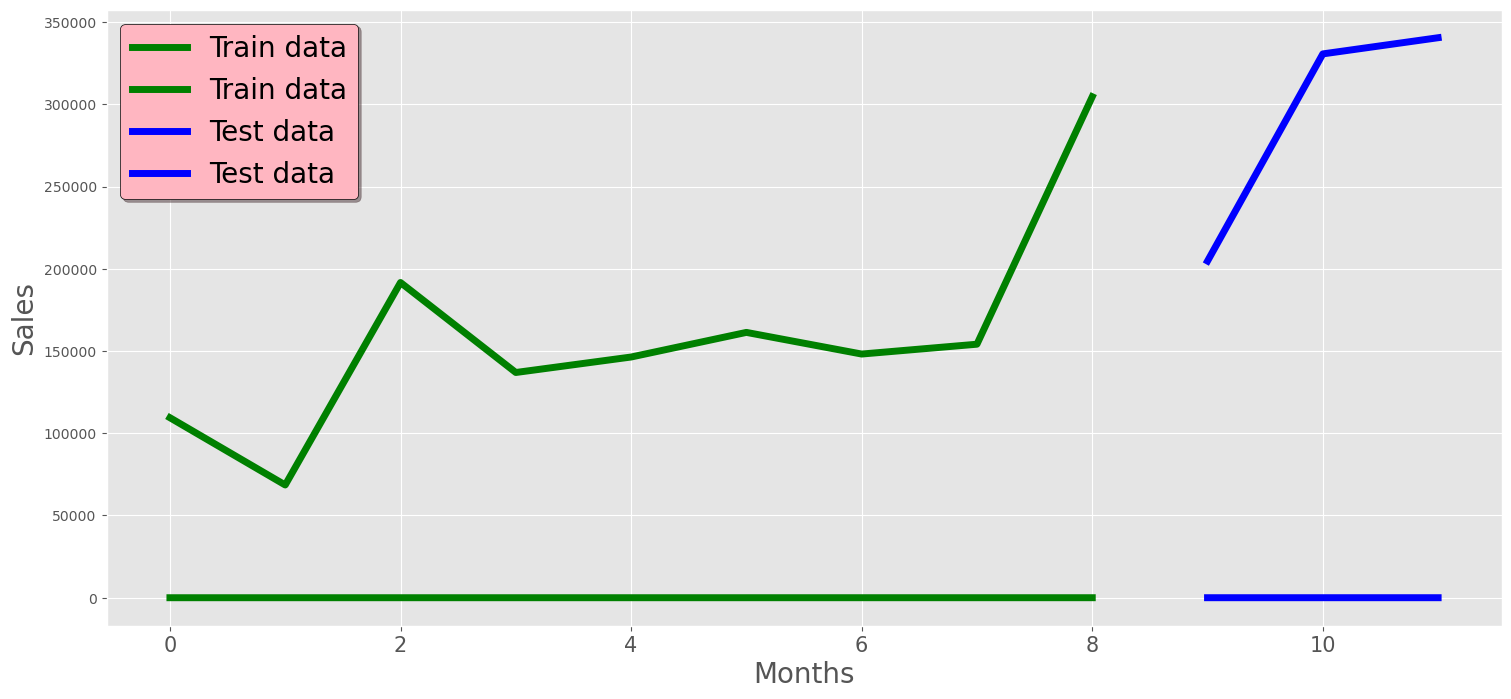

In [124]:
#split data into train and training set
train_data=train_data
test_data=test_data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

In [119]:
var1=df_sales_diff_1

In [53]:
var=df_sales_diff_1[1:]

In [54]:
var2 = pd.DataFrame([var,var1])

In [55]:
var2.T.corr

<bound method DataFrame.corr of           sales        sales
3    68407.2244   68407.2244
4   -45303.3561  -45303.3561
5    24382.0089   24382.0089
6     1808.6911    1808.6911
7    -7182.5502   -7182.5502
8   156460.5149  156460.5149
9    50573.8975   50573.8975
10   26050.5866   26050.5866
11  135790.2392  135790.2392
2           NaN   82208.6166>

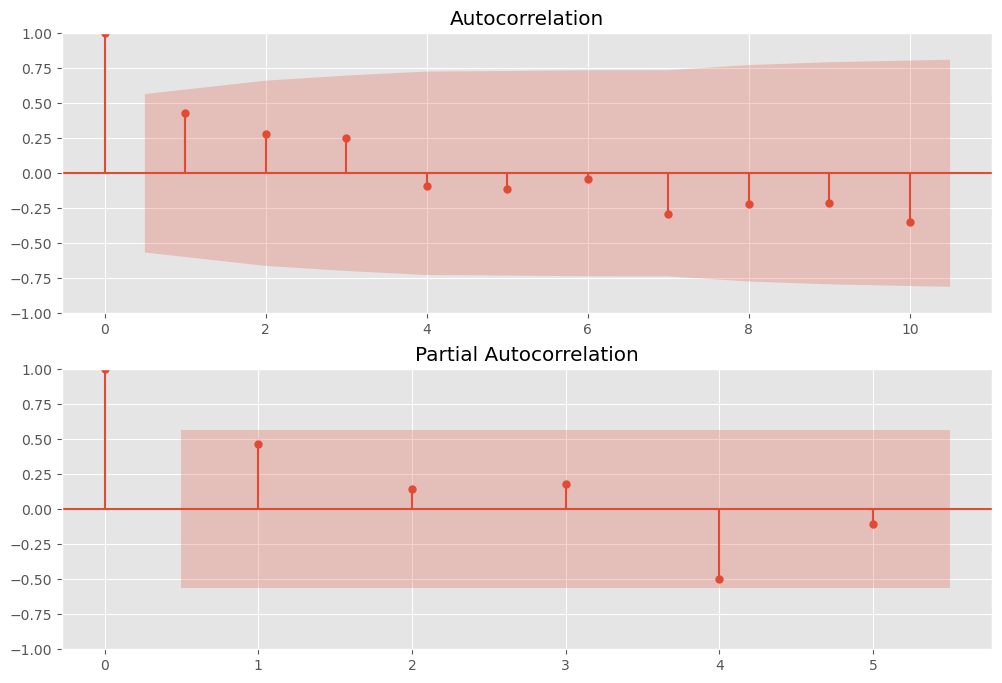

In [56]:
sales_data = sales_by_month_df['sales'].values
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_data.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_data, lags=5, ax=ax2)

In [182]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
predictions = list()
conf_list = list()
model1 = ARIMA(train_data['sales'], order=(2,1,1))
model_fit1 = model1.fit()
output1= model_fit1.forecast(steps=24)


output1

9     245083.163198
10    303327.003008
11    294752.378377
12    323337.124749
13    330532.367456
14    349320.544056
15    361135.482840
16    376441.890569
17    389354.749631
18    403196.684899
19    416104.616561
20    429135.781783
21    441702.603571
22    454143.675870
23    466275.843920
24    478209.643855
25    489890.067800
26    501355.197723
27    512590.551248
28    523611.113595
29    534415.141622
30    545010.182961
31    555398.425147
32    565584.949151
Name: predicted_mean, dtype: float64

In [183]:
summary = model_fit1.summary()

In [184]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                    9
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -99.932
Date:                Fri, 01 Mar 2024   AIC                            207.865
Time:                        16:22:19   BIC                            208.183
Sample:                             0   HQIC                           205.722
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4174      2.079      0.201      0.841      -3.658       4.492
ar.L2          0.5522      2.614      0.211      0.833      -4.572       5.676
ma.L1         -0.9089      1.734     -0.524      0.600      -4.307       2.489
sigma2      5.387e+09   2.19e-10   2.46e+19      0.000    5.39e+09    5.39e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.64
Prob(Q):                              0.81   Prob(JB):                         0.44
Heteroskedasticity (H):               2.74   Skew:                             1.11
Prob(H) (two-sided):                  0.43   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.19e+36. Standard errors may be unstable.
"""

In [172]:
y_true = test_data['sales'].values

In [173]:
y_pred = output1[:len(test_data)]

In [174]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 1490441580.0911124
Root Mean Squared Error: 38606.23758009983


ValueError: x and y must have same first dimension, but have shapes (3,) and (24,)

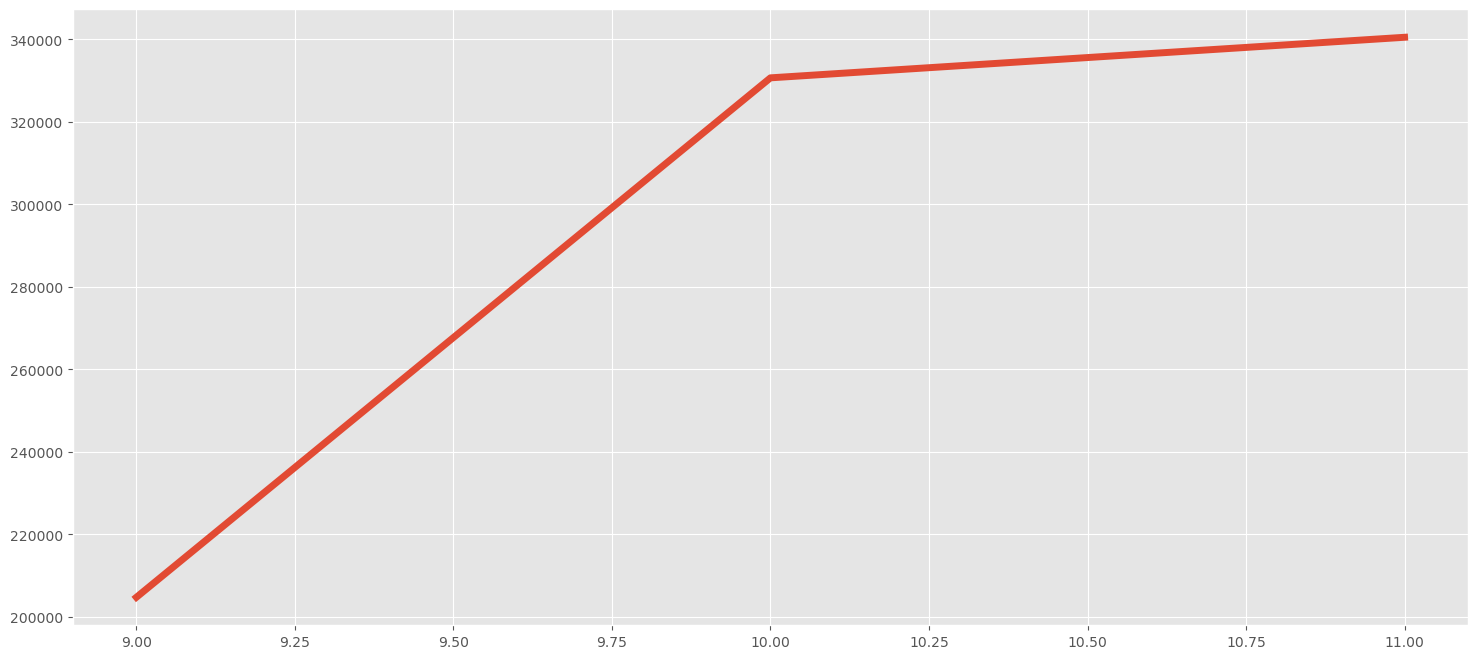

In [179]:
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.plot(test_data.index, test_data['sales'], label='True Test Sales', linewidth=5)
plt.plot(test_data.index, output1, label='Predictions on Test Data', linewidth=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')
plt.title('True vs Predicted Sales', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

In [191]:
# Compute residuals
residuals = model_fit1.resid

# Compute variance of residuals
residuals_variance = np.var(residuals)

# Calculate standard error
std_err = np.sqrt(residuals_variance)

# Calculate 95% confidence interval
conf_int = 1.96 * std_err  # 95% confidence interval
print(conf_int)


122212.18978338195


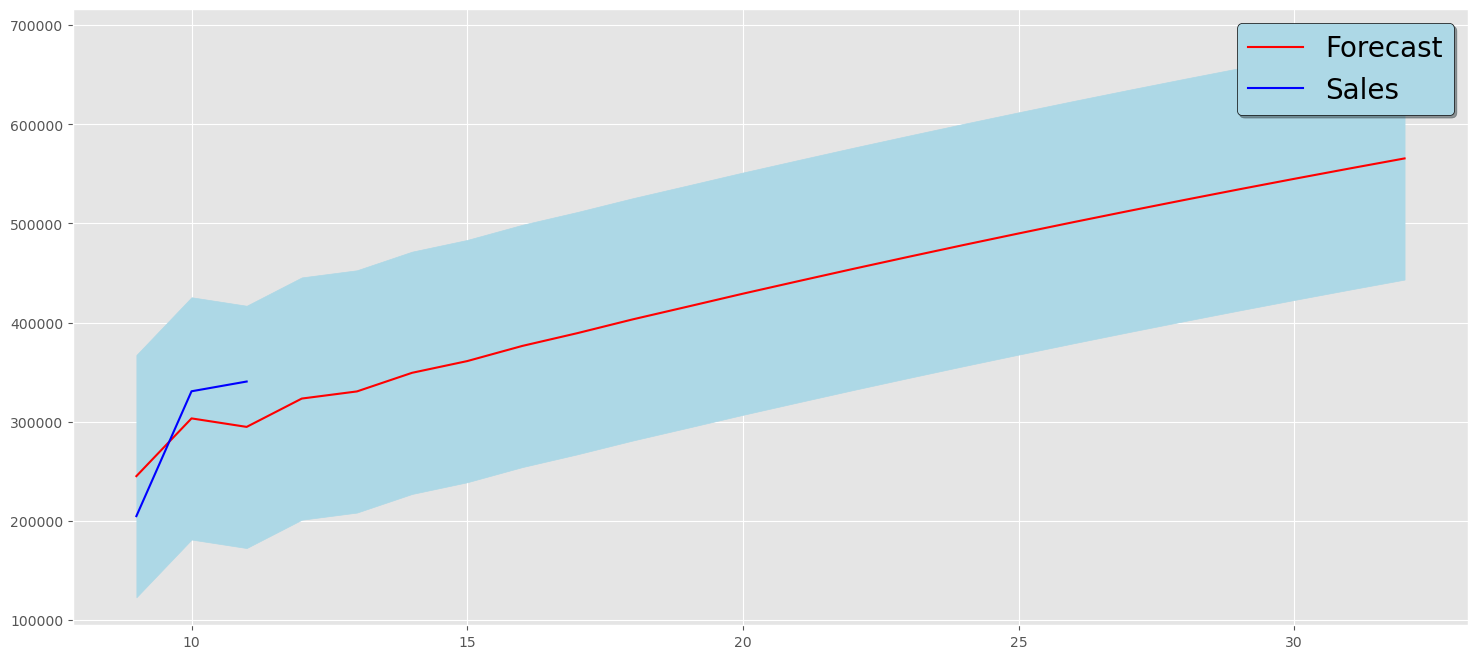

In [192]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)

# Plot forecast
ax1.plot(output1.index, output1.values, color='r', label='Forecast')

# Plot observed data
ax1.plot(test_data.index, test_data['sales'].values, color='b', label='Sales')

residuals = model_fit1.resid

# Compute variance of residuals
residuals_variance = np.var(residuals)

# Calculate standard error
std_err = np.sqrt(residuals_variance)

# Calculate 95% confidence interval
conf_int = 1.96 * std_err  # 95% confidence interval

# # Plot confidence interval
ax1.fill_between(output1.index, output1 - conf_int, output1 + conf_int, color='lightblue')

plt.grid("both")
plt.legend(fontsize=20, shadow=True, facecolor='lightblue', edgecolor='k')
plt.show()

In [239]:
train_data1 = df_sales_diff_1[:-2]
test_data1 = df_sales_diff_1[-3:]
print(f"test data = {test_data1.shape}")
print(f"train data = {train_data1.shape}")

test data = (3,)
train data = (8,)


In [240]:
model = sm.tsa.statespace.SARIMAX(train_data1, order=(2, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit()
fc = model_fit.forecast(step=4)
predictions.append(fc)

In [241]:
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data1, predictions)))

ValueError: Found input variables with inconsistent numbers of samples: [3, 8]

In [247]:
from statsmodels.tools.eval_measures import rmse

train_data1 = df_sales_diff_1[:-2]
test_data1 = df_sales_diff_1[-3:]

print(f"Test data shape: {test_data1.shape}")
print(f"Train data shape: {train_data1.shape}")

# Fit the SARIMAX model
model = sm.tsa.statespace.SARIMAX(train_data1, order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit()

# Forecast
fc = model_fit.forecast(steps=3)  # Forecast 3 steps ahead
print("Forecasted values:", fc)

# Append predictions
predictions = fc  # Initialize predictions with the forecast values

# Calculate RMSE
print('RMSE of SARIMA Model:', rmse(test_data1, predictions))


Test data shape: (3,)
Train data shape: (8,)
Forecasted values: 8     182395.150762
9     144876.479919
10     41751.201524
Name: predicted_mean, dtype: float64
RMSE of SARIMA Model: 115959.4416764248


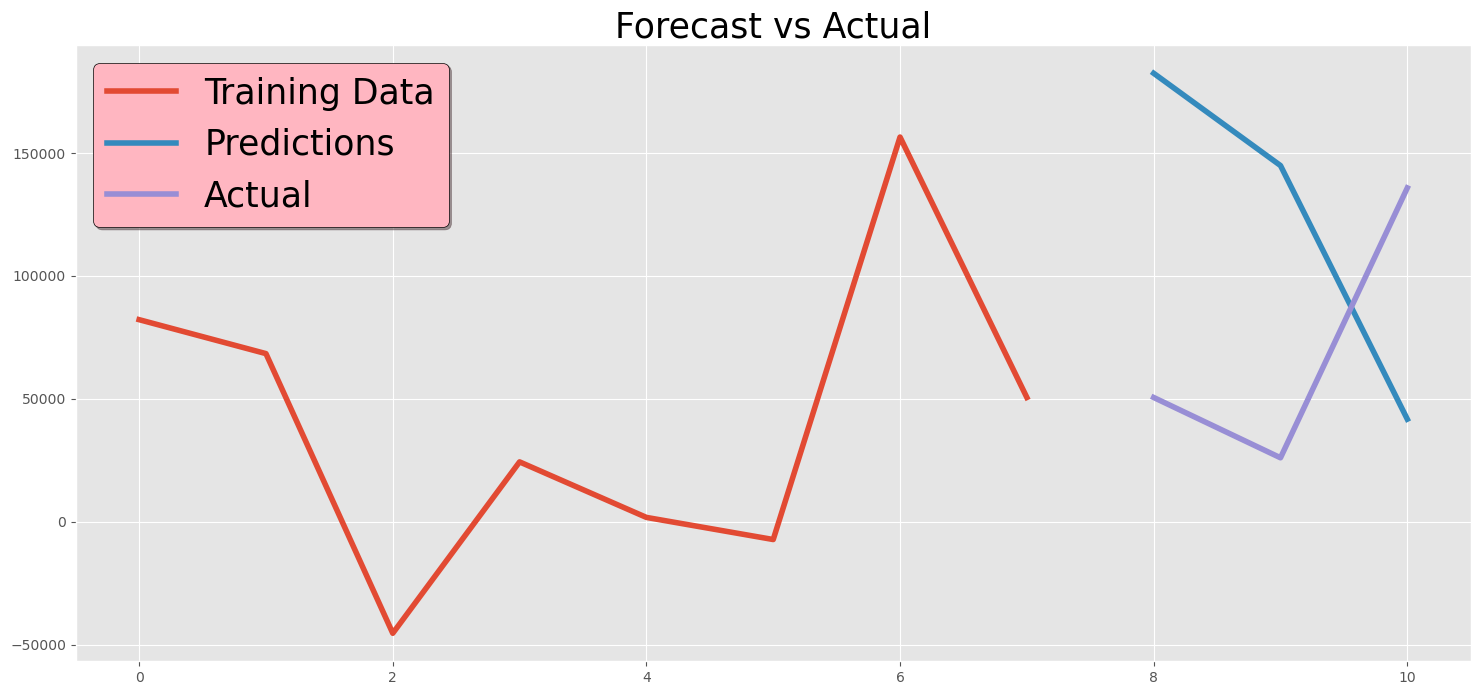

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 8))
plt.title('Forecast vs Actual', fontsize=25)
plt.plot(range(len(train_data1)), train_data1, label='Training Data', linewidth=4)
plt.plot(range(len(train_data1), len(train_data1) + len(test_data1)), predictions, label='Predictions', linewidth=4)
plt.plot(range(len(train_data1), len(train_data1) + len(test_data1)), test_data1, label='Actual', linewidth=4)
plt.legend(fontsize=25, shadow=True, facecolor='lightpink', edgecolor='k')
plt.show()


In [254]:
from pmdarima import auto_arima

# Assuming history contains your training data and test_data contains your test data

# Initialize lists
predictions = []
conf_list = []

# Iterate through test data
for t in range(len(test_data1)):
    # Fit auto ARIMA model
    model_autoARIMA = auto_arima(train_data1, start_p=0, start_q=0,
                                  test='adf',
                                  max_p=3, max_q=3,
                                  m=1,
                                  d=None,
                                  seasonal=True,
                                  start_P=0,
                                  D=0,
                                  trace=False,
                                  error_action='ignore',
                                  suppress_warnings=True,
                                  stepwise=True)
    
    # Forecast one step ahead
    fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)
    
    # Append forecast and confidence interval to lists
    predictions.append(fc[0])
    conf_list.append(confint[0])
    
    # Update history with observed value
    history.append(test_data[t])

# Now you can use predictions and conf_list for further analysis or plotting


ModuleNotFoundError: No module named 'pmdarima'

In [252]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\MM2232\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.




     -------------------------------------- 615.0/615.0 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 14.9/14.9 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [255]:
from pmdarima import auto_arima

# Assuming history contains your training data

# Fit auto ARIMA model
model_autoARIMA = auto_arima(history, start_p=0, start_q=0,
                              test='adf',       # use adftest to find optimal 'd'
                              max_p=3, max_q=3, # maximum p and q
                              m=1,              # frequency of series
                              d=None,           # let model determine 'd'
                              seasonal=True,   
                              start_P=0, 
                              D=0, 
                              trace=False,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)
    
# Forecast one step ahead
fc, confint = model_autoARIMA.predict(n_periods=1, return_conf_int=True)


ModuleNotFoundError: No module named 'pmdarima'